In [ ]:
average_weight = [33,34,35,36,32,28,29,30,31,37,36,35,33,34,31,40,24]

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_1samp(average_weight,35)

Ttest_1sampResult(statistic=-2.354253623010381, pvalue=0.03166804359862131)

In [ ]:
average_weight1 = [29,31,28,33,31,34,32,20,32,28,27,26,30,31,34,30]

In [ ]:
stats.ttest_ind(average_weight,average_weight1)

Ttest_indResult(statistic=2.404544177024533, pvalue=0.022355127034138323)

In [ ]:
before_metaphor = [68,45,46,34,23,67,80,120,34,54,68]
after_metaphor = [28,25,26,24,13,37,30,30,54,34,38]

In [ ]:
stats.ttest_rel(before_metaphor,after_metaphor)

Ttest_relResult(statistic=3.2771720738937873, pvalue=0.00832867082029929)

In [ ]:
pip install researchpy

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import scale
import researchpy as rc

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('bike_sharing.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df['atemp'].corr(df['temp'])

0.9849481104817068

In [ ]:
df.drop(['datetime','atemp'],axis=1, inplace=True)

In [ ]:
df.apply(lambda x:x.nunique())

season          4
holiday         2
workingday      2
weather         4
temp           49
humidity       89
windspeed      28
casual        309
registered    731
count         822
dtype: int64

In [ ]:
#standardize all numerical features
num_scale = scale(df[['temp','humidity','windspeed','casual','registered','count']],copy=False)

In [ ]:
num_scale

array([[-1.33366069,  0.99321305, -1.56775367, -0.66099193, -0.94385353,
        -0.9692938 ],
       [-1.43890721,  0.94124921, -1.56775367, -0.56090822, -0.81805246,
        -0.83679677],
       [-1.43890721,  0.94124921, -1.56775367, -0.62095844, -0.851158  ,
        -0.88096245],
       ...,
       [-0.80742813, -0.04606385,  0.26970368, -0.64097518,  0.05593396,
        -0.13014594],
       [-0.80742813, -0.04606385, -0.83244247, -0.48084125, -0.25525818,
        -0.34545361],
       [-0.91267464,  0.21375537, -0.46560752, -0.64097518, -0.47375478,
        -0.57180271]])

In [ ]:
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [ ]:
sample01 = df[df['workingday']==1]
sample02 = df[df['workingday']==0]

In [ ]:
print(sample01.shape,sample02.shape)

(7412, 10) (3474, 10)


In [ ]:
sample01 = sample01.sample(3474)

In [ ]:
sample01.shape

(3474, 10)

In [ ]:
sample02.shape

(3474, 10)

In [ ]:
alpha = 0.05
Stats, pvalue = stats.levene(sample01['count'],sample02['count'])
print(f"test statistics: {Stats}\n alpha: {alpha}\n pvalue: {pvalue}")
if pvalue > alpha:
  print("variances are same accept null hypothesis")
else:
  print("variances are not same reject null hypothesis")

test statistics: 0.5952676571337472
 alpha: 0.05
 pvalue: 0.4404155930392081
variances are same accept null hypothesis


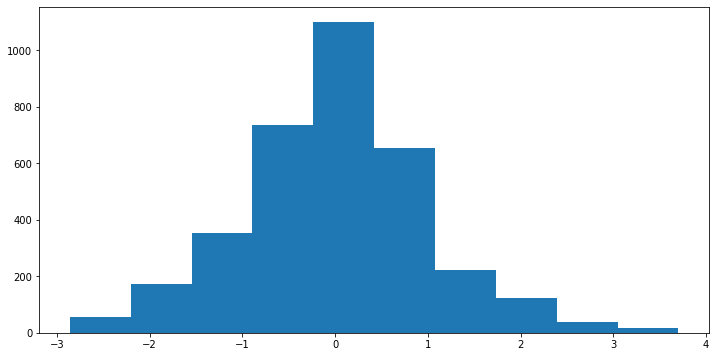

In [ ]:
diff = scale(np.array(sample01['count']) - np.array(sample02['count']))
plt.figure(figsize=(12,6))
plt.hist(diff)
plt.show()

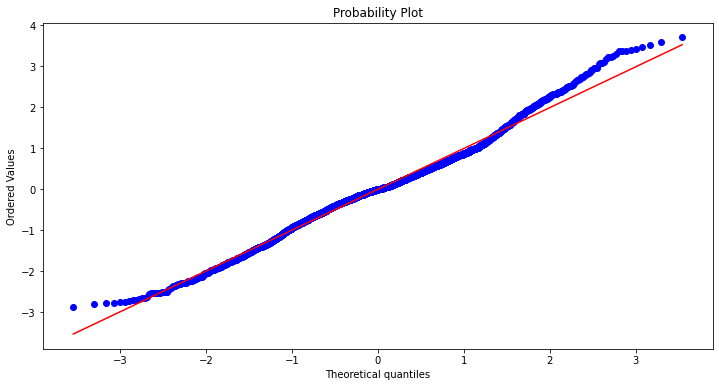

In [ ]:
#QQ plot to check the normality
plt.figure(figsize=(12,6))
stats.probplot(diff,plot=plt, dist='norm')
plt.show()

In [ ]:
#H0 = normally distributed
#HA = not normally distributed
alpha = 0.05
statistics, pvalue = stats.shapiro(diff)
if pvalue > alpha:
  print("residuals are normally distributed, reject null hypothesis")
else:
  print("residuas are not normal ")

residuas are not normal 


In [ ]:
#we will also check it by independent sample T-test (not necessary after normality not found by doing shapiro)
#H0 = there is no deference in the mean (bike rental does not depend on working day)
#HA = there is a deference in the mean
alpha = 0.05
statistics, pvalue = stats.ttest_ind(sample01['count'], sample02['count'])
if pvalue > alpha:
  print(f"fail to reject null hypothesis pvalaue:{pvalue}")
else:
  print(f"reject null hypothesis pvalue:{pvalue}")

fail to reject null hypothesis pvalaue:0.7289152324169709


In [ ]:
population_mean = 100
population_std = 15
n_samples = 30

In [ ]:
avg_class = np.vectorize(int)(np.random.normal(loc=population_mean,scale=population_std, size=n_samples))
print(f"given class iq: {avg_class}")

given class iq: [ 80 111 104 104 121  97  92 110  79 103  87  91 113  72  90 119  98  92
 120 109 117 105 102  98  70 107 103  86 100 106]


In [ ]:
given_class = np.vectorize(int)(np.random.normal(loc=112.5, scale=population_std, size=n_samples))
print(f"given class iq: {given_class}")

given class iq: [100 107 100 102 120 107 105 129  86 116 129 109 122 120 130 109 130 138
 114 105 126  75 117 126 107 103 109 133 100 109]


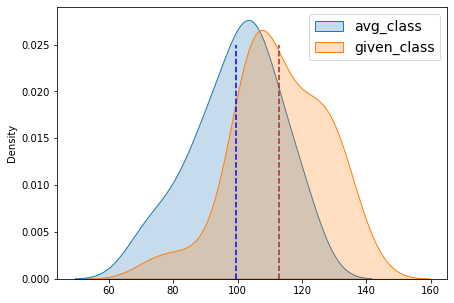

In [ ]:
plt.figure(figsize=(7,5))
sns.kdeplot(avg_class,shade=True)
sns.kdeplot(given_class,shade=True)
plt.legend(['avg_class','given_class'], fontsize=14)
plt.vlines(x=avg_class.mean(),ymin=0,ymax=0.025,color='blue',linestyle='--')
plt.vlines(x=given_class.mean(), ymin=0, ymax=0.025,color='brown', linestyle='--')
plt.show()